<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - SVM
    <br>
<font color=black size=4>
    Alireza Gargoori Motlagh, Alireza Heidari
    
<br><br>
<font size=4>
   **Name**: <br>
   **Student ID**: <br> <br>
In this homework, we are going to implement the algorithms from the second and third chapters of the course, so reading the notebooks of these chapters would be quite useful. Also, we are going to evaulate and compare our models by the metrics defined in chapter 3. Keep in mind to complete all of the following questions and write your own codes in the TODO parts.

## <font face="Times New Roman" size=4><div dir=ltr>
## Problem 3: Face Classification by SVM on Eigenfaces (150 points)
In the following problem, we are going to build a classifier to distinguish the faces of 40 people on a toy dataset. The dataset includes 400 pictures of 40 people faces, each by a 64*64 pixel picture. Use the following cell to download the dataset:

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)
print(faces.images[0].shape)

(400, 4096)
(64, 64)


<font face="Times New Roman" size=4><div dir=ltr>
### Visualization of the Faces (5 points)
Plot an image of each class in one figure using subplots. (Note that the design matrix X is availabe in <code>faces.data</code> and the target values available in <code>faces.target</code> .)

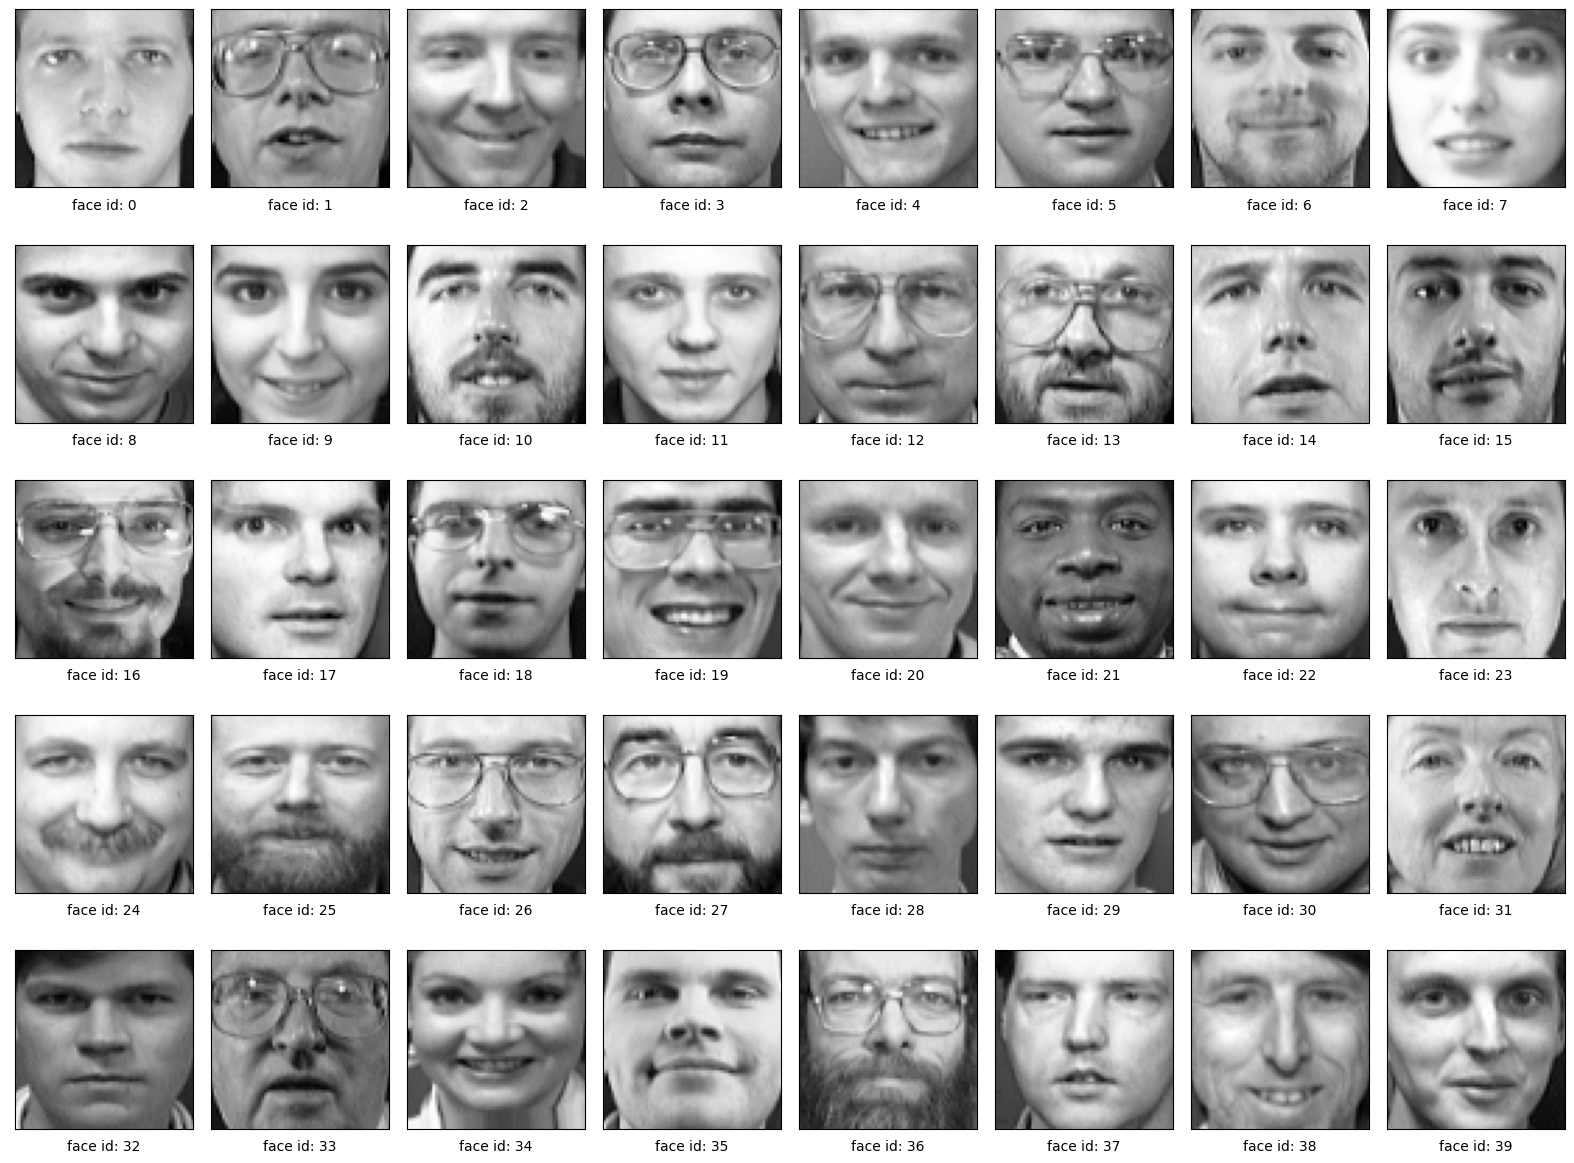

In [2]:
# plot an image each class
fig, axes = plt.subplots(5, 8, figsize=(20, 15), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i * 10], cmap="gray")
    ax.set(xticks=[], yticks=[],
           xlabel=f"face id: {faces.target[i * 10]}")

<font face="Times New Roman" size=4><div dir=ltr>
### Train-Test Split (2 points)
Split the data into train and test sets and print the dimensions of each set. (70% for train and 30% for test)

In [3]:
from sklearn.model_selection import train_test_split

X = faces.data
y = faces.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train dimensions: {X_train.shape}")
print(f"X_test dimensions: {X_test.shape}")
print(f"y_train dimensions: {y_train.shape}")
print(f"y_test dimensions: {y_test.shape}")

X_train dimensions: (280, 4096)
X_test dimensions: (120, 4096)
y_train dimensions: (280,)
y_test dimensions: (120,)


<font face="Times New Roman" size=4><div dir=ltr>
### Dimensionality Reduction (18 points)
As you might have guessed, the number of featuers, i.e. pixels, is quite large and training a classifier might take a considerbale time. However, using a wise method to reduce the dimension of our data could decrease the cost of training the model. In the following cell use PCA (Principal Component Analysis) to reduce the dimension of the dataset. Choose an appropirate number of components in your PCA and explain your reason for your choice.

In [4]:
# import pca
from sklearn.decomposition import PCA

def svd_flip(u, v):
    max_abs_cols = np.argmax(np.abs(u), axis=0)
    signs = np.sign(u[max_abs_cols, range(u.shape[1])])
    u *= signs
    v *= signs[:, np.newaxis]
    return u, v


def best_n_for_pca(eigenvalues, p):
    
    total = sum(eigenvalues)
    partial_sum = 0
    for i, eigenvalue in enumerate(eigenvalues):
        partial_sum += eigenvalue
        if partial_sum / total >= p:
            return i + 1
        
        
def pca(X):
    n_samples, n_features = X.shape
    X = X - np.mean(X, axis=0)
    
    U, S, V = np.linalg.svd(X, full_matrices=False, compute_uv=True)
        
    U, V = svd_flip(U, V)
    components_ = V

    explained_variance_ = (S ** 2) / (n_samples - 1)
    explained_variance_ratio_ = explained_variance_ / explained_variance_.sum()
    
    n_components = best_n_for_pca(explained_variance_, 0.85)
    
    components_ = components_[:n_components].T
    
    
    return np.dot(X, components_), explained_variance_ratio_, n_components


X_train_pca, evr, n_components = pca(X_train)

<font face="Times New Roman" size=4><div dir=ltr>
Plot the scree plot of the proportion of the variance explained(PVE) vs principal components to determine the number of principal components for futher analysis.

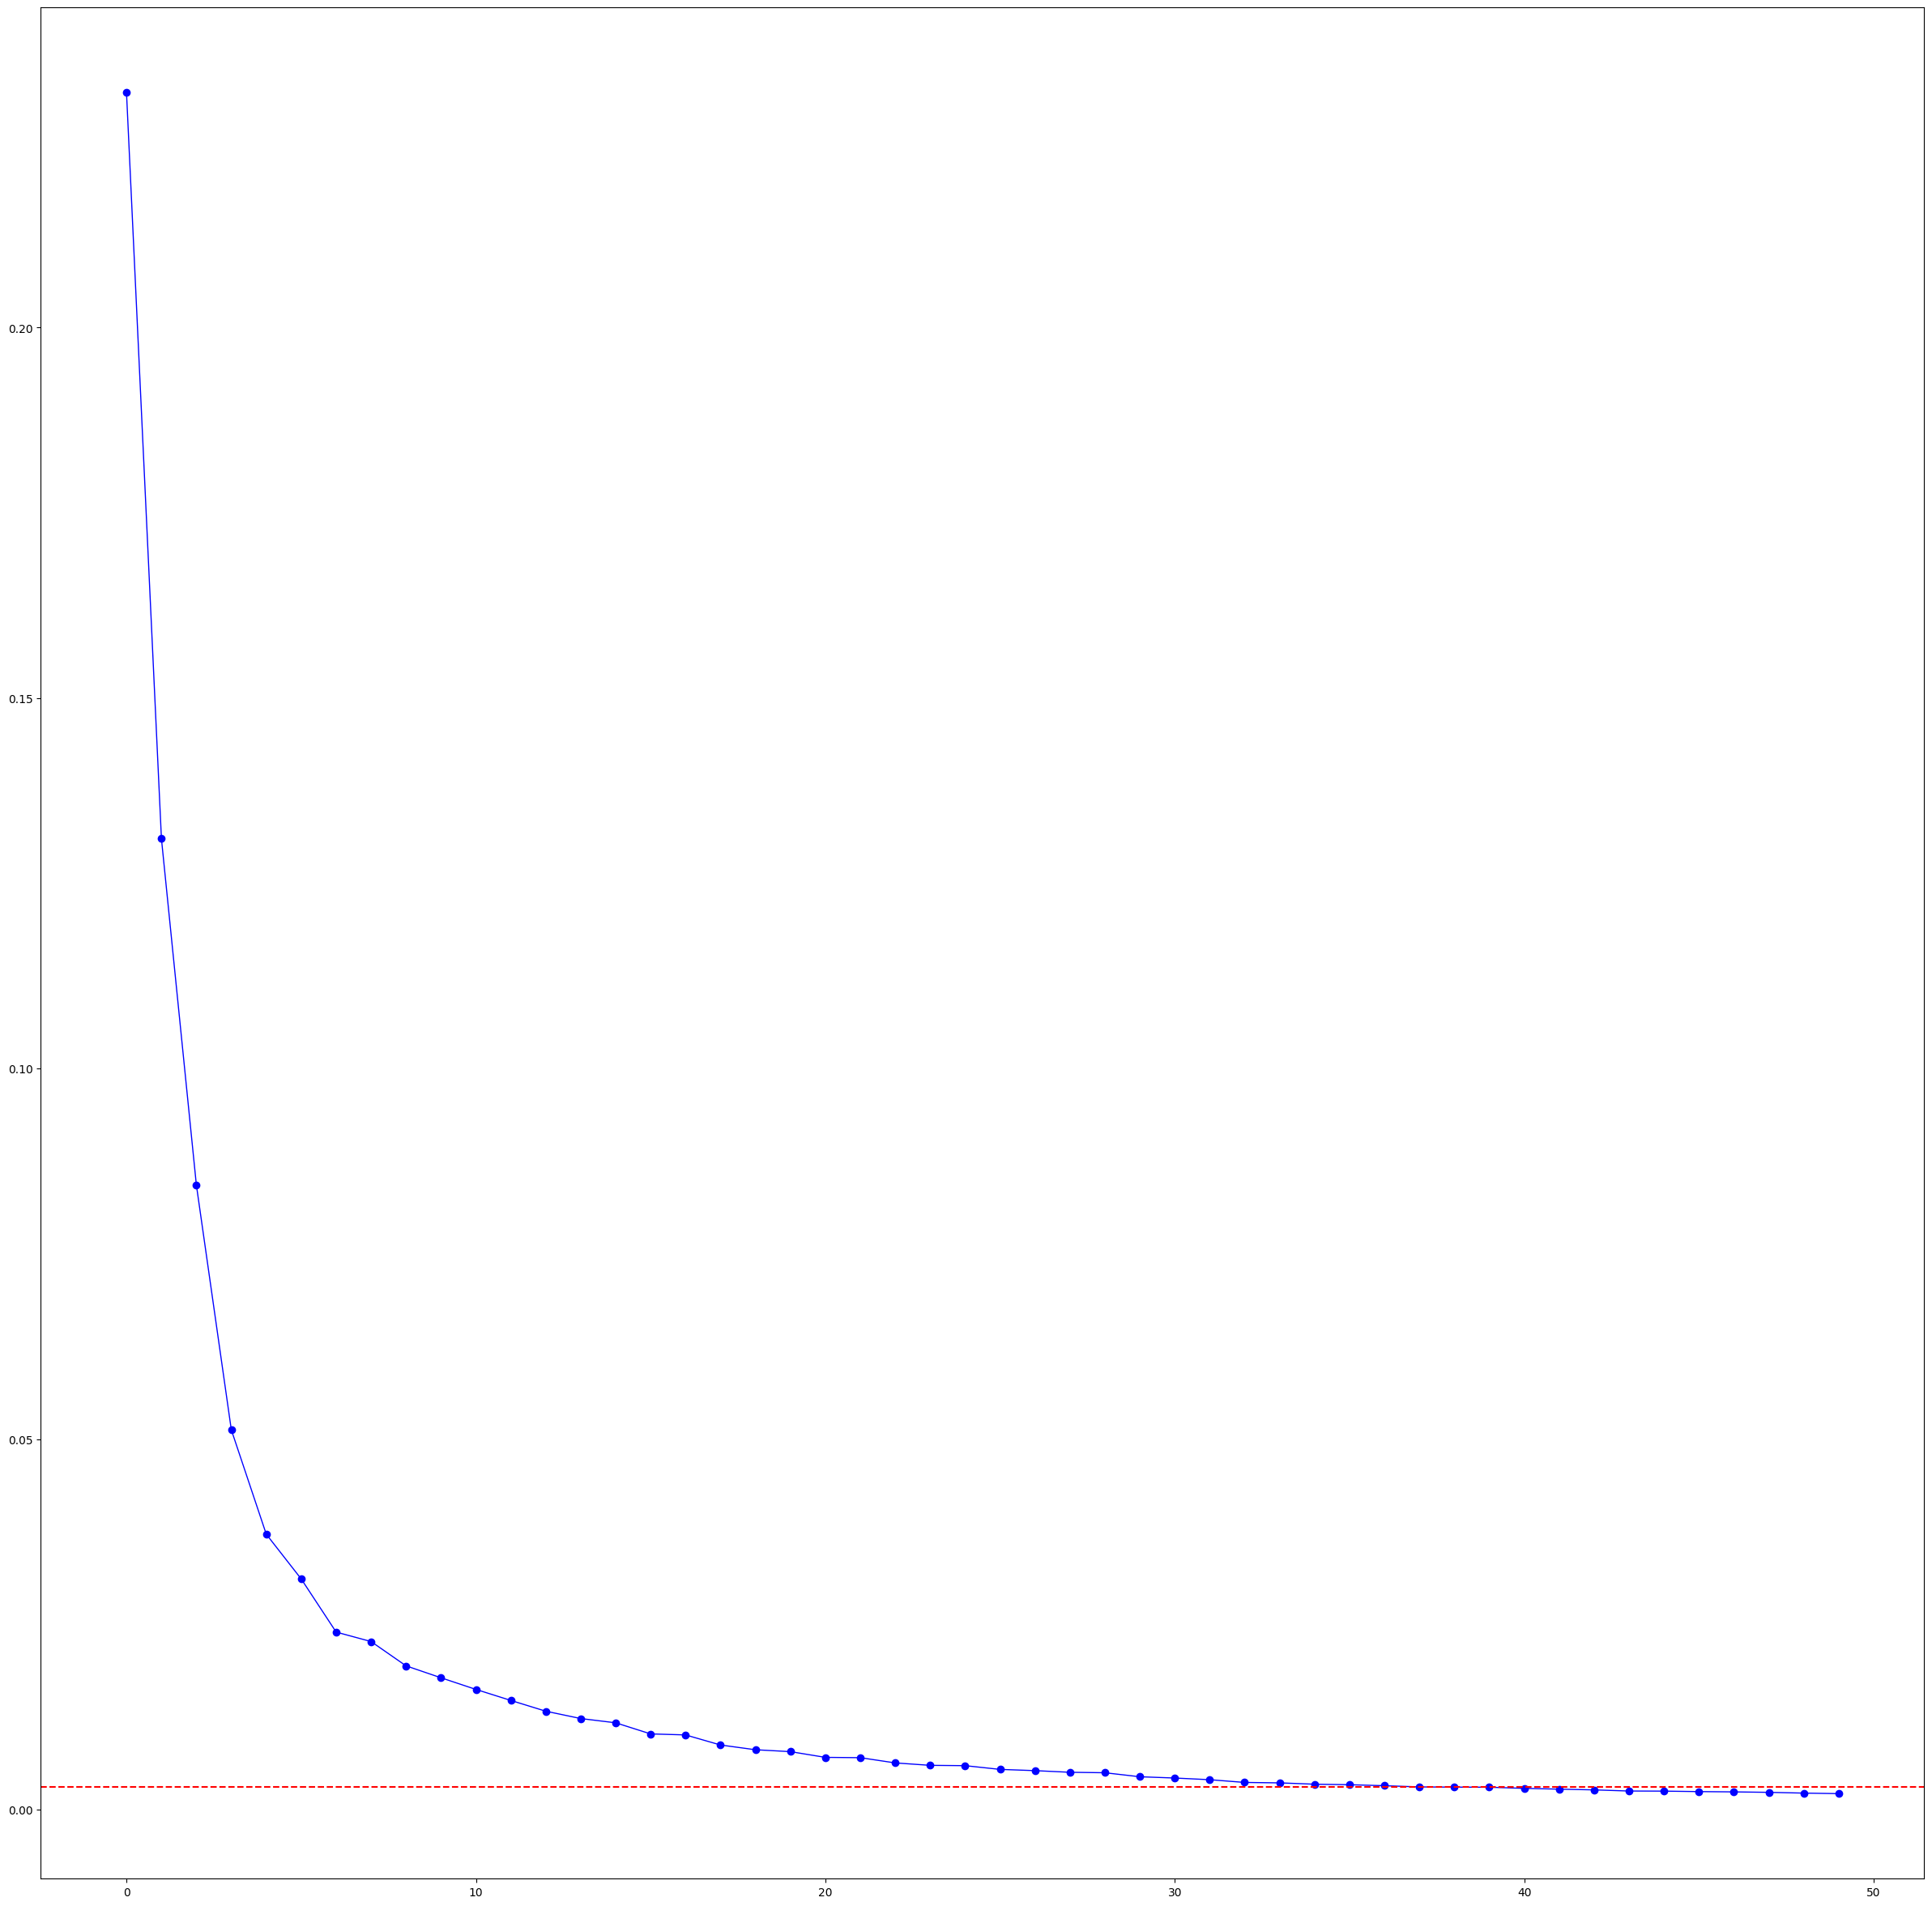

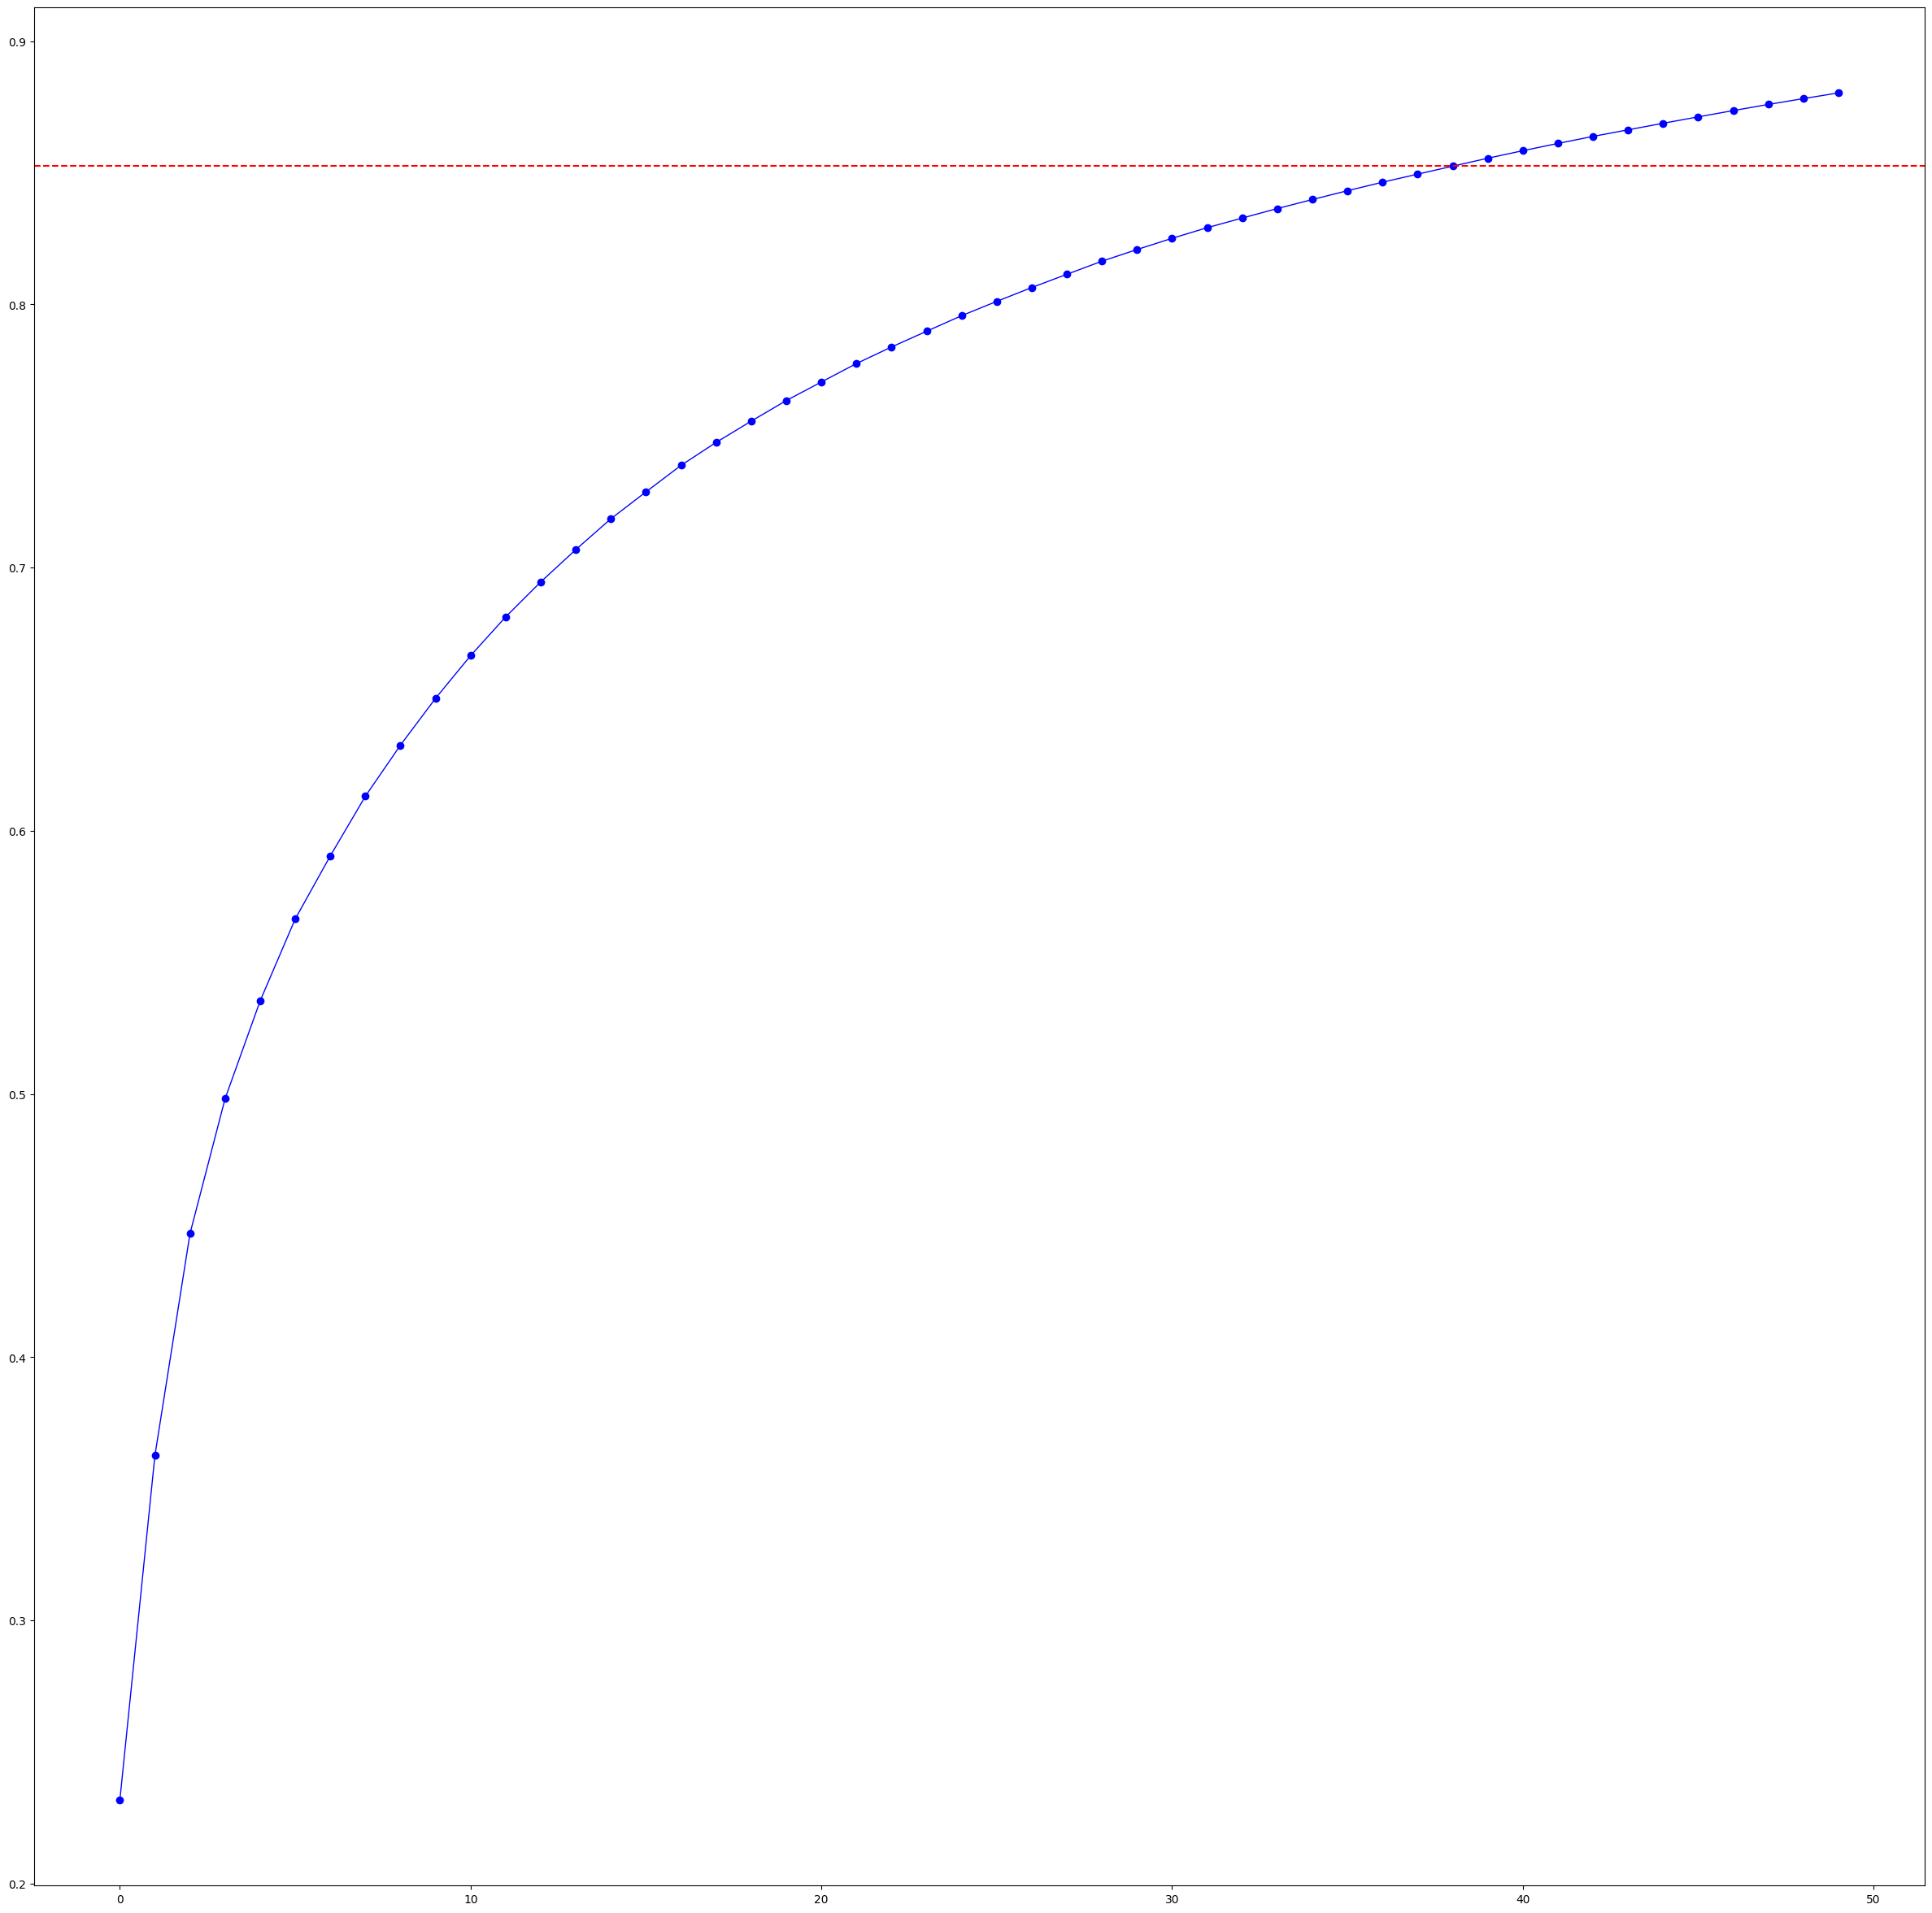

In [5]:
fig, ax = plt.subplots(figsize=(30, 30))
ax.plot(evr[:50], 'o-', linewidth=1, color='blue')
elbow = np.where(np.abs(np.diff(evr)) < 0.00002)[0][0]
ax.axhline(y=evr[elbow], color='red', linestyle='--')
plt.show()
fig, ax = plt.subplots(figsize=(30, 30))
ax.plot(np.cumsum(evr)[:50], 'o-', linewidth=1, color='blue')
ax.axhline(y=np.cumsum(evr)[elbow], color='red', linestyle='--')
plt.show()


# PCA using sklearn

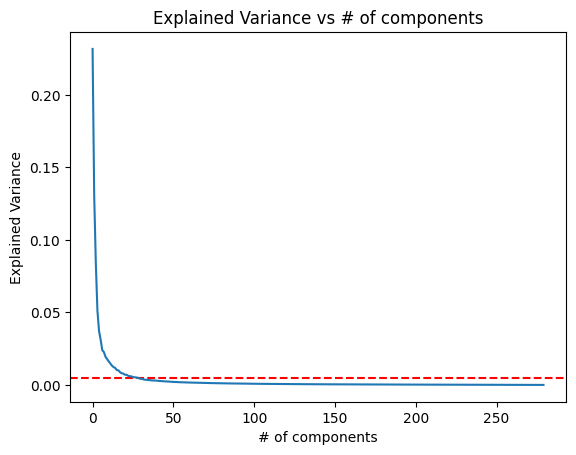

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(X_train))
pca.fit(X_train)

plt.ylabel('Explained Variance')
plt.xlabel('# of components')
plt.title('Explained Variance vs # of components')

plt.axhline(y=0.005, color='red', linestyle='--')
plt.plot(pca.explained_variance_ratio_)

plt.show()

<font face="Times New Roman" size=4><div dir=ltr>
### Eigenfaces: Principal Components Visualization (25 points)
Plot the mean face using your PCA model with <code>pca.mean_</code> attribute followed by a reshape to original dimensions. What is this mean vector?

It is the average of all the images in the dataset. Each pixel in the image is the average of all the pixels in the same position in all the images. i.e. the mean of each feature in the dataset.

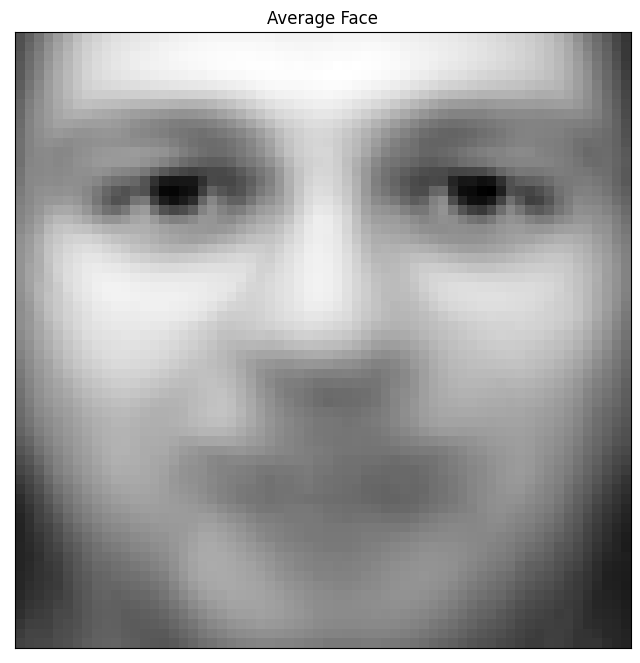

In [7]:
# plot the mean face
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')
plt.show()

<font face="Times New Roman" size=4><div dir=ltr>
Eigenfaces is the name given to a set of eigenvectors when used in the computer vision problem of human face recognition. Plot the 30 first eigenfaces sorted by their rank from the most important to the lowest. Can you explain what these faces indicate?

They are the most important features of faces in the dataset. The first eigenface is the most important feature in the dataset. The second eigenface is the second most important And so on.

In [8]:
pca = PCA(n_components=39)
pca.fit(X_train)

PCA(n_components=39)

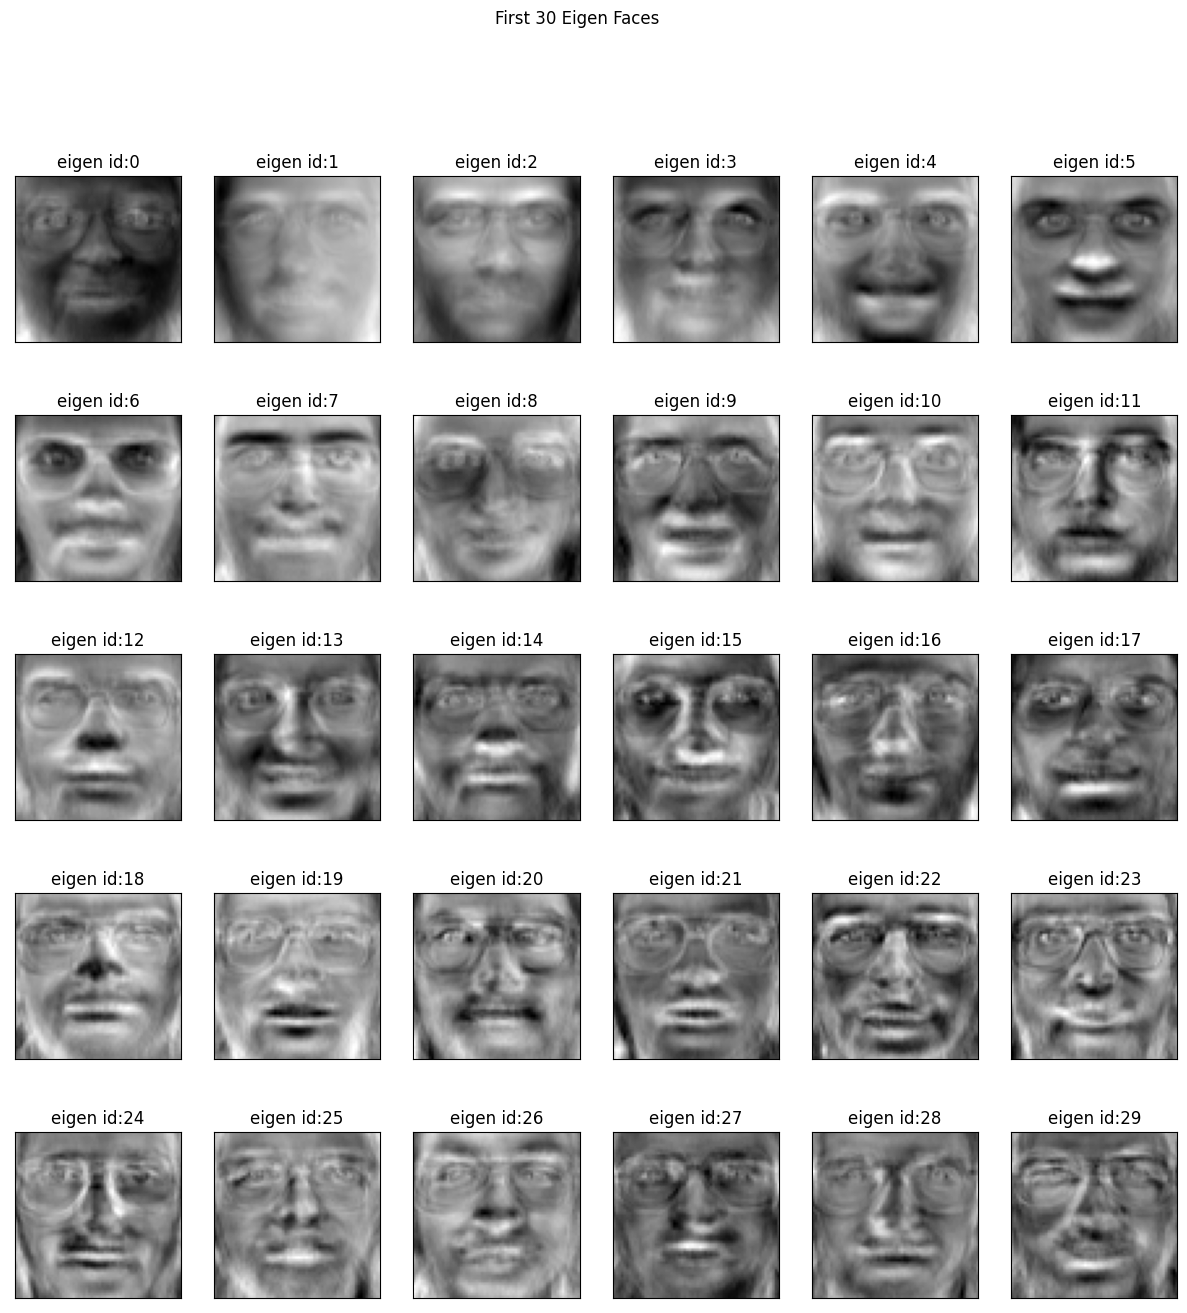

In [9]:
eigen_faces=pca.components_.reshape((len(pca.components_),64,64))

fig, axarr=plt.subplots(nrows=5, ncols=6, figsize=(15,15))
axarr=axarr.flatten()

for i in range(30):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("First 30 Eigen Faces".format(5*"=", 5*"="))
plt.show()

<font face="Times New Roman" size=4><div dir=ltr>
Transform your train and test sets to the new feature space using your PCA module. 

In [10]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca.shape, X_test_pca.shape

((280, 39), (120, 39))

<font face="Times New Roman" size=4><div dir=ltr>
### Training your SVM Classifier (50 points)
Train an SVM classifier on the transformed dataset in the new feature space. You should use Grid Search Cross Validation or other validation techniques to obtain the best hyperparameters for your classifier. 

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['sigmoid', 'linear', 'poly', 'rbf'], "degree":[2, 3, 4, 5]}
grid_search = GridSearchCV(SVC(), param_grid, cv=cv, refit=True, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train_pca, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 580 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:   11.3s finished


In [12]:
best_model, best_params

(SVC(C=100, degree=2, gamma=0.001),
 {'C': 100, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'})

<font face="Times New Roman" size=4><div dir=ltr>
After training your model, we can check its prediction on test samples. Run the following cell to check your model predictions with the target values on test samples. Predictions with red label indicate false classification of your model.

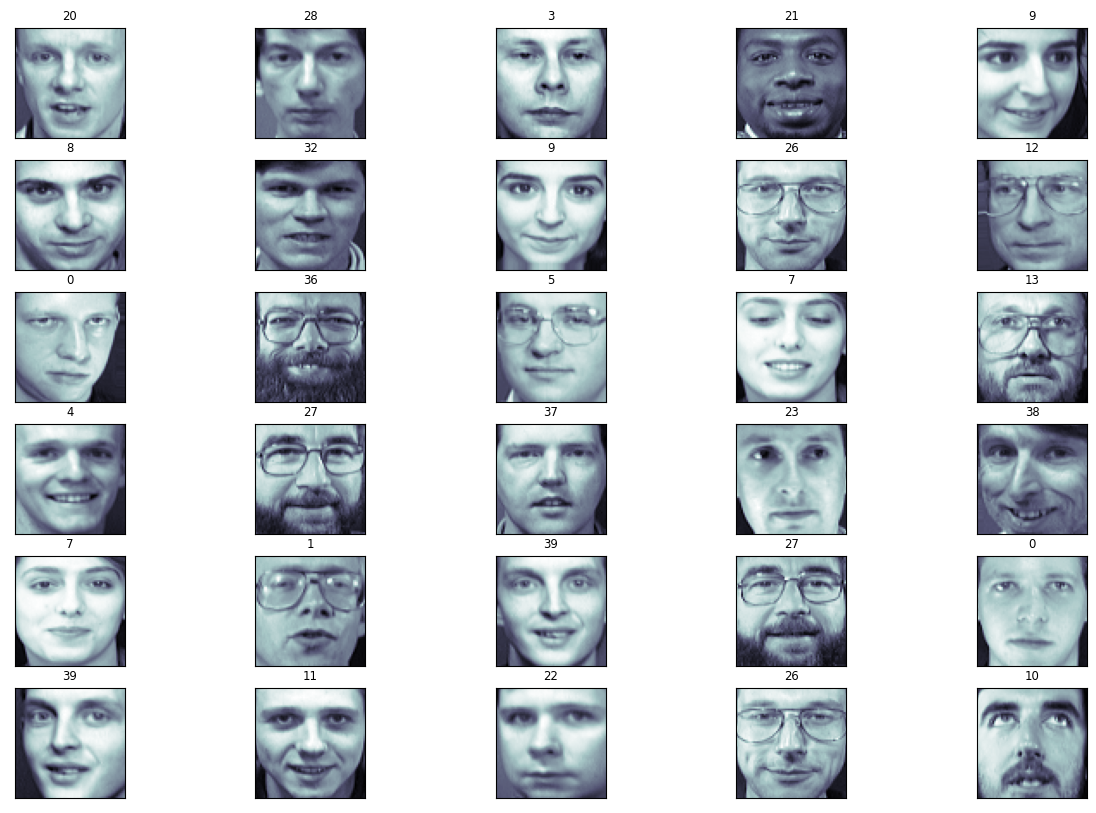

In [13]:
clf = best_model
X_test_new = X_test_pca

fig = plt.figure(figsize=(15, 10))
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_new[i, np.newaxis])[0] #X_test_new is the transformed X_test after PCA.
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

<font face="Times New Roman" size=4><div dir=ltr>
## Performance Measures
Let's evaluate your classifier to find out how good your model is.
    
    
### Precision Recall Tradeoff (20 points)
Plot the precision and recall versus the decision threshold figure and precision vs recall figure.

In [14]:
from sklearn.metrics import precision_recall_curve, average_precision_score

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

target=label_binarize(y, classes=range(40))
n_classes=target.shape[1]

X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass=train_test_split(X, 
                                                                                              target,
                                                                                             test_size=0.3,
                                                                                             stratify=target,
                                                                                     random_state=0)

pca = PCA(n_components=39)
pca.fit(X_train_multiclass)
X_train_multiclass_pca = pca.transform(X_train_multiclass)
X_test_multiclass_pca = pca.transform(X_test_multiclass)

one_rest_classifier=OneVsRestClassifier(clf)
one_rest_classifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_score = one_rest_classifier.decision_function(X_test_multiclass_pca)

In [15]:
precision = {}
recall = {}
average_precision = {}

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_multiclass[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test_multiclass[:, i], y_score[:, i])

precision["micro"], recall["micro"], thresholds = precision_recall_curve(y_test_multiclass.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_multiclass, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.97


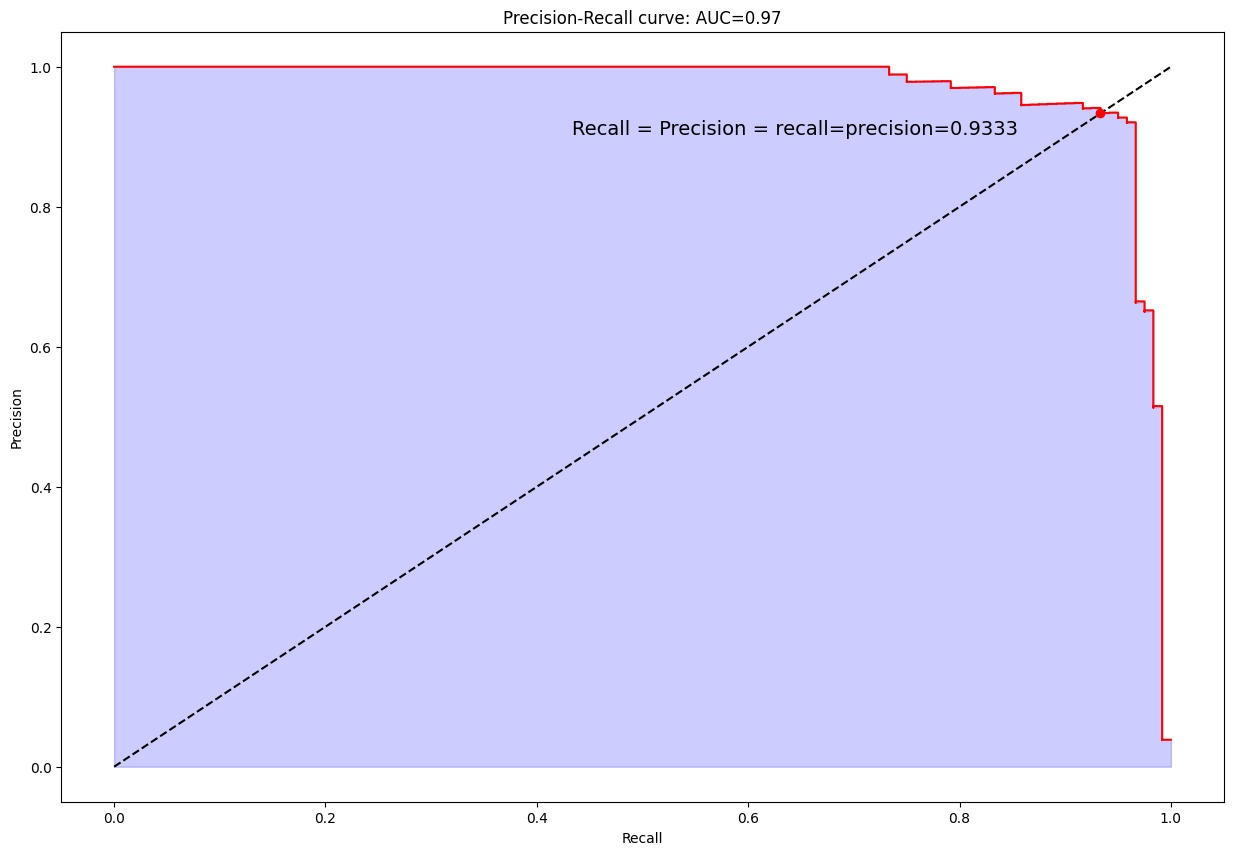

In [16]:
plt.figure(1, figsize=(15,10))
plt.step(recall['micro'], precision['micro'], color='red',
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')


plt.plot([0, 1], [0, 1], 'k--')


dth_index = np.where([precision['micro'] == recall['micro']])[1][0]
dth = precision['micro'][dth_index]

plt.plot(dth, dth, 'ro')
plt.text(dth - 0.5, dth - 0.03, 'Recall = Precision = ' + f'recall=precision={dth:.4f}', fontsize=14)



plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title('Precision-Recall curve: AUC={0:0.2f}'.format(average_precision["micro"]))
plt.show()

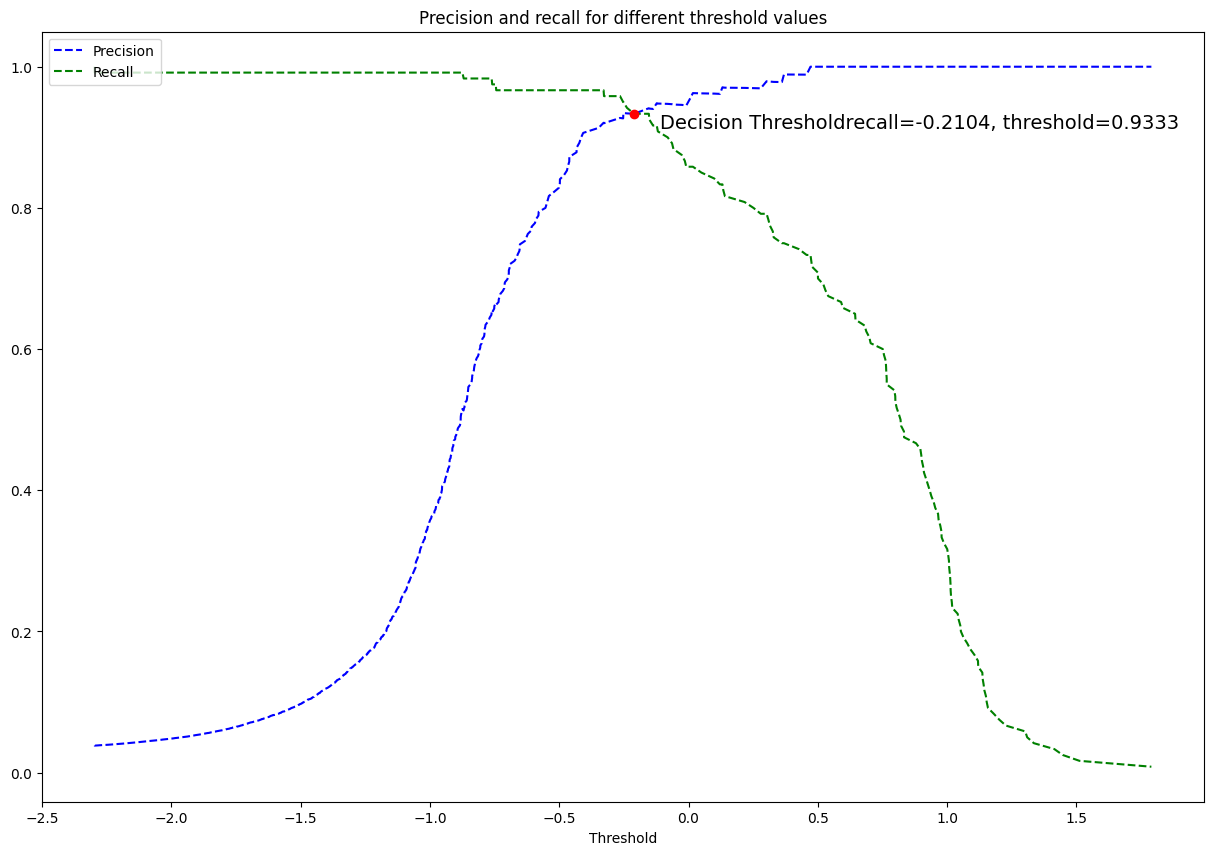

In [17]:
# plot threshold vs Precision
plt.figure(2, figsize=(15,10))
plt.plot(thresholds, precision['micro'][:-1], 'b--', label='Precision')
plt.plot(thresholds, recall['micro'][:-1], 'g--', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.title('Precision and recall for different threshold values')

dth_index = np.where([precision['micro'] == recall['micro']])[1][0]
dth = thresholds[dth_index]
dth_recall = recall['micro'][dth_index]

plt.plot(dth, dth_recall, 'ro')
plt.text(dth + 0.1, dth_recall - 0.02, 'Decision Threshold' + f'recall={dth:.4f}, threshold={dth_recall:.4f}', fontsize=14)

plt.show()

In [18]:
thresholds[dth_index]

-0.21038045817075268

<font face="Times New Roman" size=4><div dir=ltr>
Then find the decision threshold, where the recall is equal to the precision. Write it down in the below cell:
    <br>
note: it should be apparent in the above figures.

decision_threshold = -0.1590

recall at the above threshold = 0.9417

<font face="Times New Roman" size=4><div dir=ltr>
### ROC/AUC (10 points)
Train a RandomForestClassifier with 30 estimators then plot a ROC curve, and calculate AUC for both randomForsetClassifier and your SVM classifier that you trained earlier, which one is the best by considering AUC indicator?


In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=42)
rf.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=42)

Average precision score, micro-averaged over all classes: 0.99


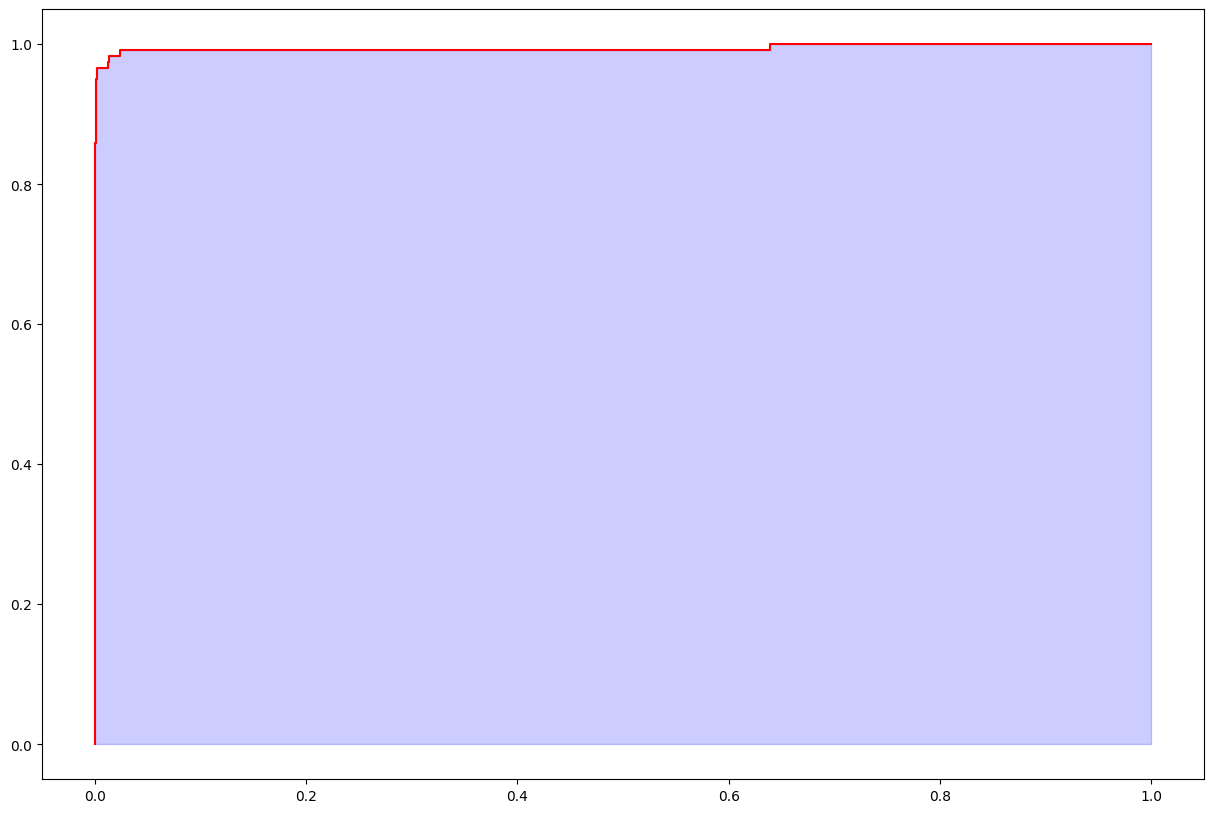

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score = one_rest_classifier.decision_function(X_test_multiclass_pca)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_multiclass[:, i],
                                                        y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_multiclass[:, i], y_score[:, i])

fpr["micro"], tpr["micro"], thresholds = roc_curve(y_test_multiclass.ravel(),
    y_score.ravel())
roc_auc["micro"] = roc_auc_score(y_test_multiclass, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(roc_auc["micro"]))

plt.figure(1, figsize=(15,10))
plt.step(fpr['micro'], tpr['micro'], color='red', where='post')
plt.fill_between(fpr["micro"], tpr["micro"], alpha=0.2, color='b')

plt.show()
    

Average precision score, micro-averaged over all classes: 0.96


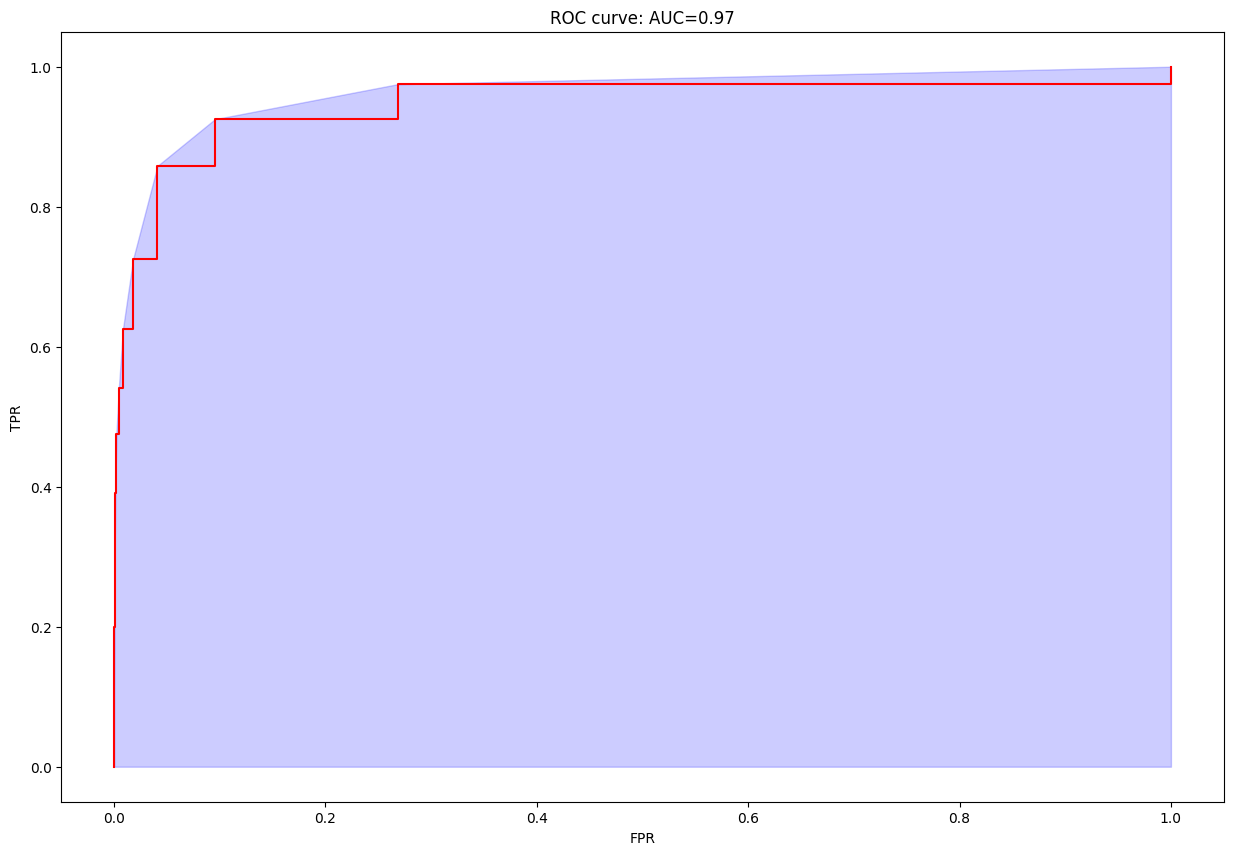

In [21]:
one_rest_classifier=OneVsRestClassifier(rf)
one_rest_classifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_proba = one_rest_classifier.predict_proba(X_test_multiclass_pca)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_multiclass[:, i],
                                                        y_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_multiclass[:, i], y_proba[:, i])

fpr["micro"], tpr["micro"], thresholds = roc_curve(y_test_multiclass.ravel(),
    y_proba.ravel())
roc_auc["micro"] = roc_auc_score(y_test_multiclass, y_proba,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(roc_auc["micro"]))

plt.figure(1, figsize=(15,10))
plt.step(fpr['micro'], tpr['micro'], color='red', where='post')
plt.fill_between(fpr["micro"], tpr["micro"], alpha=0.2, color='b')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.title('ROC curve: AUC={0:0.2f}'.format(average_precision["micro"]))
plt.show()
    


By comparing AUC for SVM and RandomForest, we conclude SVM is a better model.

<font face="Times New Roman" size=4><div dir=ltr>
### Classification Report (5 points)
Use the <code>classification_report</code> to describe the performance of your SVM model with different metrics. Explain your results and compare the predictions of model on different classes in few sentences.

In [22]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.75      0.86         8
           8       1.00      1.00      1.00         2
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         5
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          17       0.75      1.00      0.86         3
          18       1.00    

The report shows the main classification metrics precision, recall and f1-score on a per-class basis.

The precision is the ratio $\frac{tp}{tp + fp}$ where $tp$ is the number of true positives and $fp$ the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The recall is the ratio $\frac{tp}{tp + fn}$ where $fn$ the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. The f1_score can be interpreted as a weighted harmonic mean of t he precision and recall, where an f1_score reaches its best value at $1$ and worst score at $0$. The support is the number of occurrences of each class in y_true.

Based on what said and the result above, we can conclude that the model is good at predicting the faces of the people in the dataset.


<font face="Times New Roman" size=4><div dir=ltr>
### Confusion Matrix (15 points)
Plot the confusion matrix of the classifier's predictions.
Let’s focus on the errors of the plot. Divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute number of errors, then plot the result.

In [23]:
# TODO: calculate conf_mx then print it
from sklearn.metrics import confusion_matrix

np.set_printoptions(threshold=np.inf)
conf_mx = confusion_matrix(y_test, y_pred)
print(conf_mx)

[[3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 6 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]
 [0 

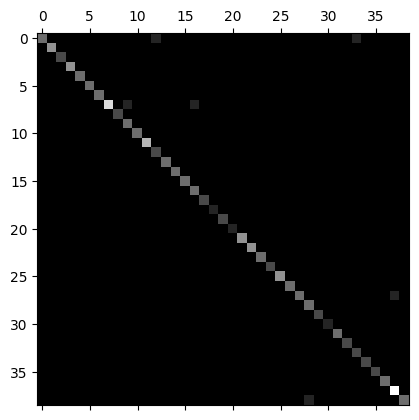

In [24]:
# TODO: after calculating confusion matrix, visualize it using below code

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [25]:
# TODO: calculate norm_conf_mx then print it
# calculate error rates
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
# fill diagonal with zeros to keep only the errors
# np.fill_diagonal(norm_conf_mx, 0)
norm_conf_mx

array([[0.6  , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.2  , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.2  , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0

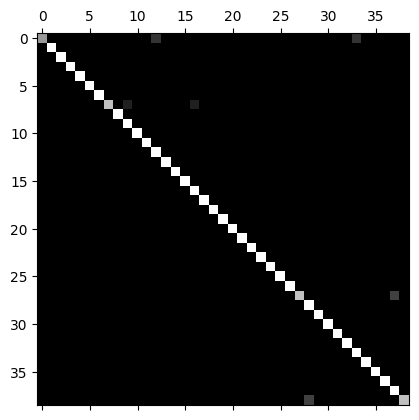

In [29]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()